# Table of Contents

* [1.Introduction](#introduction)  
* [2.Prerequisites](#prerequisites)  
* [3.Data Overview](#dataoverview)  
* [4.Exploratory Data Analysis](#eda)

# <a name="introduction"></a>1.Introduction

# <a name="prerequisites"></a>2.Prerequisites

## 2.1 Load the libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as offline
offline.init_notebook_mode(connected=True)

import plotly.graph_objs as go


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from geopy.geocoders import Nominatim
import gc

## 2.2 Emvironment Setting

In [30]:
# Data directory
data_dir = './'
sns.set()

## 2.3. Data Glimpse

In [31]:
donations = pd.read_csv(data_dir+"Donations.csv",error_bad_lines=False)
donations.head()

Project ID                       Donation ID  \
0  000009891526c0ade7180f8423792063  688729120858666221208529ee3fc18e   
1  000009891526c0ade7180f8423792063  dcf1071da3aa3561f91ac689d1f73dee   
2  000009891526c0ade7180f8423792063  18a234b9d1e538c431761d521ea7799d   
3  000009891526c0ade7180f8423792063  38d2744bf9138b0b57ed581c76c0e2da   
4  000009891526c0ade7180f8423792063  5a032791e31167a70206bfb86fb60035   

                           Donor ID Donation Included Optional Donation  \
0  1f4b5b6e68445c6c4a0509b3aca93f38                                  No   
1  4aaab6d244bf3599682239ed5591af8a                                 Yes   
2  0b0765dc9c759adc48a07688ba25e94e                                 Yes   
3  377944ad61f72d800b25ec1862aec363                                 Yes   
4  6d5b22d39e68c656071a842732c63a0c                                 Yes   

   Donation Amount  Donor Cart Sequence Donation Received Date  
0           178.37                   11    2016-08-23 13:15:57  
1            25.00                    2    2016-06-06 20:05:23  
2            20.00                    3    2016-06-06 14:08:46  
3            25.00                    1    2016-05-15 10:23:04  
4            25.00                    2    2016-05-17 01:23:38

In [32]:
projects = pd.read_csv(data_dir+"Projects.csv",error_bad_lines=False)
projects.head()

Project ID                         School ID  \
0  7685f0265a19d7b52a470ee4bac883ba  e180c7424cb9c68cb49f141b092a988f   
1  f9f4af7099061fb4bf44642a03e5c331  08b20f1e2125103ed7aa17e8d76c71d4   
2  afd99a01739ad5557b51b1ba0174e832  1287f5128b1f36bf8434e5705a7cc04d   
3  c614a38bb1a5e68e2ae6ad9d94bb2492  900fec9cd7a3188acbc90586a09584ef   
4  ec82a697fab916c0db0cdad746338df9  3b200e7fe3e6dde3c169c02e5fb5ae86   

                         Teacher ID  Teacher Project Posted Sequence  \
0  4ee5200e89d9e2998ec8baad8a3c5968                               25   
1  cca2d1d277fb4adb50147b49cdc3b156                                3   
2  6c5bd0d4f20547a001628aefd71de89e                                1   
3  8ed6f8181d092a8f4c008b18d18e54ad                               40   
4  893173d62775f8be7c30bf4220ad0c33                                2   

  Project Type                                      Project Title  \
0  Teacher-Led             Stand Up to Bullying: Together We Can!   
1  Teacher-Led                                 Learning in Color!   
2  Teacher-Led  Help Second Grade ESL Students Develop Languag...   
3  Teacher-Led  Help Bilingual Students Strengthen Reading Com...   
4  Teacher-Led                   Help Us Make Each Minute Count!    

                                       Project Essay  \
0  Did you know that 1-7 students in grades K-12 ...   
1  Help us have a fun, interactive listening cent...   
2  Visiting or moving to a new place can be very ...   
3  Students at our school are still working hard ...   
4  "Idle hands" were something that Issac Watts s...   

                           Project Short Description  \
0  Did you know that 1-7 students in grades K-12 ...   
1  Help us have a fun, interactive listening cent...   
2  Visiting or moving to a new place can be very ...   
3  Students at our school are still working hard ...   
4  "Idle hands" were something that Issac Watts s...   

                              Project Need Statement  \
0  My students need 25 copies of "Bullying in Sch...   
1  My students need a listening center, read alon...   
2  My students need beginning vocabulary audio ca...   
3  My students need one copy of each book in The ...   
4  My students need items such as Velcro, two pou...   

           Project Subject Category Tree  \
0                       Applied Learning   
1  Applied Learning, Literacy & Language   
2                    Literacy & Language   
3                    Literacy & Language   
4                          Special Needs   

         Project Subject Subcategory Tree Project Grade Level Category  \
0  Character Education, Early Development                Grades PreK-2   
1             Early Development, Literacy                Grades PreK-2   
2                                     ESL                Grades PreK-2   
3                           ESL, Literacy                   Grades 3-5   
4                           Special Needs                   Grades 3-5   

  Project Resource Category  Project Cost Project Posted Date  \
0                Technology        361.80          2013-01-01   
1                Technology        512.85          2013-01-01   
2                  Supplies        435.92          2013-01-01   
3                     Books        161.26          2013-01-01   
4                  Supplies        264.19          2013-01-01   

  Project Expiration Date Project Current Status Project Fully Funded Date  
0              2013-05-30           Fully Funded                2013-01-11  
1              2013-05-31                Expired                       NaN  
2              2013-05-30           Fully Funded                2013-05-22  
3              2013-05-31           Fully Funded                2013-02-06  
4              2013-05-30           Fully Funded                2013-01-01

In [33]:
donors = pd.read_csv(data_dir+"Donors.csv",error_bad_lines=False)
donors.head()

Donor ID    Donor City Donor State  \
0  00000ce845c00cbf0686c992fc369df4      Evanston    Illinois   
1  00002783bc5d108510f3f9666c8b1edd    Appomattox       other   
2  00002d44003ed46b066607c5455a999a        Winton  California   
3  00002eb25d60a09c318efbd0797bffb5  Indianapolis     Indiana   
4  0000300773fe015f870914b42528541b      Paterson  New Jersey   

  Donor Is Teacher Donor Zip  
0               No       602  
1               No       245  
2              Yes       953  
3               No       462  
4               No       075

In [34]:
resources = pd.read_csv(data_dir+"Resources.csv",error_bad_lines=False)
resources.head()

Project ID  \
0  000009891526c0ade7180f8423792063   
1  00000ce845c00cbf0686c992fc369df4   
2  00002d44003ed46b066607c5455a999a   
3  00002d44003ed46b066607c5455a999a   
4  00002d44003ed46b066607c5455a999a   

                          Resource Item Name  Resource Quantity  \
0                  chair move and store cart                1.0   
1            sony mdr zx100 blk   headphones               40.0   
2  gaiam kids stay-n-play balance ball, grey                4.0   
3    cf520x - giant comfy pillows - set of 4                1.0   
4              serta lounger, mini, sky blue                1.0   

   Resource Unit Price          Resource Vendor Name  
0               350.00                           NaN  
1                12.86                         CDW-G  
2                19.00               Amazon Business  
3               269.00  Lakeshore Learning Materials  
4               131.85               Amazon Business

In [35]:
schools = pd.read_csv(data_dir+"Schools.csv",error_bad_lines=False)
schools.head()

School ID                             School Name  \
0  00003e0fdd601b8ea0a6eb44057b9c5e              Capon Bridge Middle School   
1  00004e32a448b4832e1b993500bf0731  The Woodlands College Park High School   
2  0002021bb799f28de224f1acc1ff08c4        Samantha Smith Elementary School   
3  0004604f675212a8cac1161338265196            Kingsbury Country Day School   
4  0004c9d50bcf0cea990f844e58b5e2c3              Redwater Elementary School   

  School Metro Type  School Percentage Free Lunch   School State  School Zip  \
0             rural                          56.0  West Virginia       26711   
1             urban                          41.0          Texas       77384   
2          suburban                           2.0     Washington       98074   
3           unknown                          76.0       Michigan       48370   
4             rural                          50.0          Texas       75573   

     School City School County               School District  
0   Capon Bridge     Hampshire  Hampshire Co School District  
1  The Woodlands    Montgomery    Conroe Ind School District  
2      Sammamish          King  Lake Washington Sch Dist 414  
3         Oxford       Oakland    Michigan Dept Of Education  
4       Redwater         Bowie     Redwater Ind Sch District

In [36]:
teachers = pd.read_csv(data_dir+"Teachers.csv",error_bad_lines=False)
teachers.head()

Teacher ID Teacher Prefix  \
0  00000f7264c27ba6fea0c837ed6aa0aa           Mrs.   
1  00002d44003ed46b066607c5455a999a           Mrs.   
2  00006084c3d92d904a22e0a70f5c119a            Mr.   
3  0000a9af8b6b9cc9e41f53322a8b8cf1            Ms.   
4  0000d4777d14b33a1406dd6c9019fe89            Ms.   

  Teacher First Project Posted Date  
0                        2013-08-21  
1                        2016-10-23  
2                        2016-09-08  
3                        2015-10-25  
4                        2017-02-10

# <a name="dataoverview"></a>3.Data overview

## 3.1 Data summary

In [37]:
donors.describe()

Donor ID Donor City Donor State  \
count                            2122640    1909543     2122640   
unique                           2122640      15204          52   
top     f3af0345aa33da330ff360b18712fcb1    Chicago  California   
freq                                   1      34352      294695   

       Donor Is Teacher Donor Zip  
count           2122640   1942580  
unique                2      1934  
top                  No       606  
freq            1910355     34628

In [38]:
donations.describe(include='all')

Project ID                       Donation ID  \
count                            4687884                           4687884   
unique                            901965                           4687844   
top     c34218abf3fecd36be01305d67ed7fbb  dcc1c4772a5f8d5882fd31dd133252e4   
freq                                 863                                 2   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

                                Donor ID Donation Included Optional Donation  \
count                            4687884                             4687884   
unique                           2024554                                   2   
top     39df9399f5384334a42905bcf0acdcbf                                 Yes   
freq                               18035                             4001709   
mean                                 NaN                                 NaN   
std                                  NaN                                 NaN   
min                                  NaN                                 NaN   
25%                                  NaN                                 NaN   
50%                                  NaN                                 NaN   
75%                                  NaN                                 NaN   
max                                  NaN                                 NaN   

        Donation Amount  Donor Cart Sequence Donation Received Date  
count      4.687884e+06         4.687884e+06                4687884  
unique              NaN                  NaN                4066370  
top                 NaN                  NaN    2018-03-08 12:51:27  
freq                NaN                  NaN                     72  
mean       6.066879e+01         1.430545e+02                    NaN  
std        1.668996e+02         8.723086e+02                    NaN  
min        1.000000e-02         1.000000e+00                    NaN  
25%        1.482000e+01         1.000000e+00                    NaN  
50%        2.500000e+01         2.000000e+00                    NaN  
75%        5.000000e+01         1.200000e+01                    NaN  
max        6.000000e+04         1.811600e+04                    NaN

In [39]:
projects.describe(include='all')

Project ID                         School ID  \
count                            1110017                           1110017   
unique                           1110015                             72361   
top     c940d0e78b7559573aca536db90c0646  7f0412c9ac3cea57048543879e4e6318   
freq                                   2                              1752   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

                              Teacher ID  Teacher Project Posted Sequence  \
count                            1110017                     1.110017e+06   
unique                            395706                              NaN   
top     fa2f220b537e8653fb48878ebb38044d                              NaN   
freq                                 320                              NaN   
mean                                 NaN                     1.124050e+01   
std                                  NaN                     2.595475e+01   
min                                  NaN                     1.000000e+00   
25%                                  NaN                     1.000000e+00   
50%                                  NaN                     3.000000e+00   
75%                                  NaN                     9.000000e+00   
max                                  NaN                     4.970000e+02   

       Project Type     Project Title  \
count       1110017           1110011   
unique            3            926127   
top     Teacher-Led  Flexible Seating   
freq        1092163              1107   
mean            NaN               NaN   
std             NaN               NaN   
min             NaN               NaN   
25%             NaN               NaN   
50%             NaN               NaN   
75%             NaN               NaN   
max             NaN               NaN   

                                            Project Essay  \
count                                             1110016   
unique                                            1108272   
top     Remember all the required reading you did as a...   
freq                                                   14   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                Project Short Description  \
count                                             1110014   
unique                                             841893   
top     As a teacher in a low-income/high poverty scho...   
freq                                                 2139   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                     Project Need Statement Project Subject Category Tree  \
count                               1110014                       1109988   
unique                              1080023            

In [40]:
resources.describe(include='all')

Project ID Resource Item Name  \
count                            7210448            7209887   
unique                           1208649            1073886   
top     07a021f92447be2ef4a6cb955bc4c1d1               trip   
freq                                 367              21233   
mean                                 NaN                NaN   
std                                  NaN                NaN   
min                                  NaN                NaN   
25%                                  NaN                NaN   
50%                                  NaN                NaN   
75%                                  NaN                NaN   
max                                  NaN                NaN   

        Resource Quantity  Resource Unit Price Resource Vendor Name  
count        7.186149e+06         7.186138e+06              7128454  
unique                NaN                  NaN                   31  
top                   NaN                  NaN      Amazon Business  
freq                  NaN                  NaN              3203262  
mean         2.816518e+00         5.341337e+01                  NaN  
std          8.866547e+00         1.863248e+02                  NaN  
min          0.000000e+00         0.000000e+00                  NaN  
25%          1.000000e+00         7.260000e+00                  NaN  
50%          1.000000e+00         1.439000e+01                  NaN  
75%          2.000000e+00         3.640000e+01                  NaN  
max          4.125000e+03         9.708550e+04                  NaN

In [41]:
schools.describe(include='all')

School ID                School Name  \
count                              72993                      72993   
unique                             72993                      56831   
top     cbbfe20be025373c738c745227815b0f  Lincoln Elementary School   
freq                                   1                        203   
mean                                 NaN                        NaN   
std                                  NaN                        NaN   
min                                  NaN                        NaN   
25%                                  NaN                        NaN   
50%                                  NaN                        NaN   
75%                                  NaN                        NaN   
max                                  NaN                        NaN   

       School Metro Type  School Percentage Free Lunch School State  \
count              72993                  71852.000000        72993   
unique                 5                           NaN           51   
top             suburban                           NaN   California   
freq               22992                           NaN         8457   
mean                 NaN                     58.556115          NaN   
std                  NaN                     25.508378          NaN   
min                  NaN                      0.000000          NaN   
25%                  NaN                     40.000000          NaN   
50%                  NaN                     61.000000          NaN   
75%                  NaN                     80.000000          NaN   
max                  NaN                    100.000000          NaN   

          School Zip    School City School County           School District  
count   72993.000000          72766         72991                     72993  
unique           NaN          10400          1782                     10852  
top              NaN  New York City   Los Angeles  New York City Dept Of Ed  
freq             NaN           2051          2110                      1718  
mean    53382.093406            NaN           NaN                       NaN  
std     29131.096568            NaN           NaN                       NaN  
min       705.000000            NaN           NaN                       NaN  
25%     29554.000000            NaN           NaN                       NaN  
50%     53095.000000            NaN           NaN                       NaN  
75%     78572.000000            NaN           NaN                       NaN  
max     99950.000000            NaN           NaN                       NaN

In [42]:
teachers.describe(include='all')

Teacher ID Teacher Prefix  \
count                             402900         402872   
unique                            402900              6   
top     b5122128d8474e7f64e30f3673fbce14           Mrs.   
freq                                   1         202142   

       Teacher First Project Posted Date  
count                             402900  
unique                              4699  
top                           2015-09-13  
freq                                2067

## 3.1. Missing Data Distribution

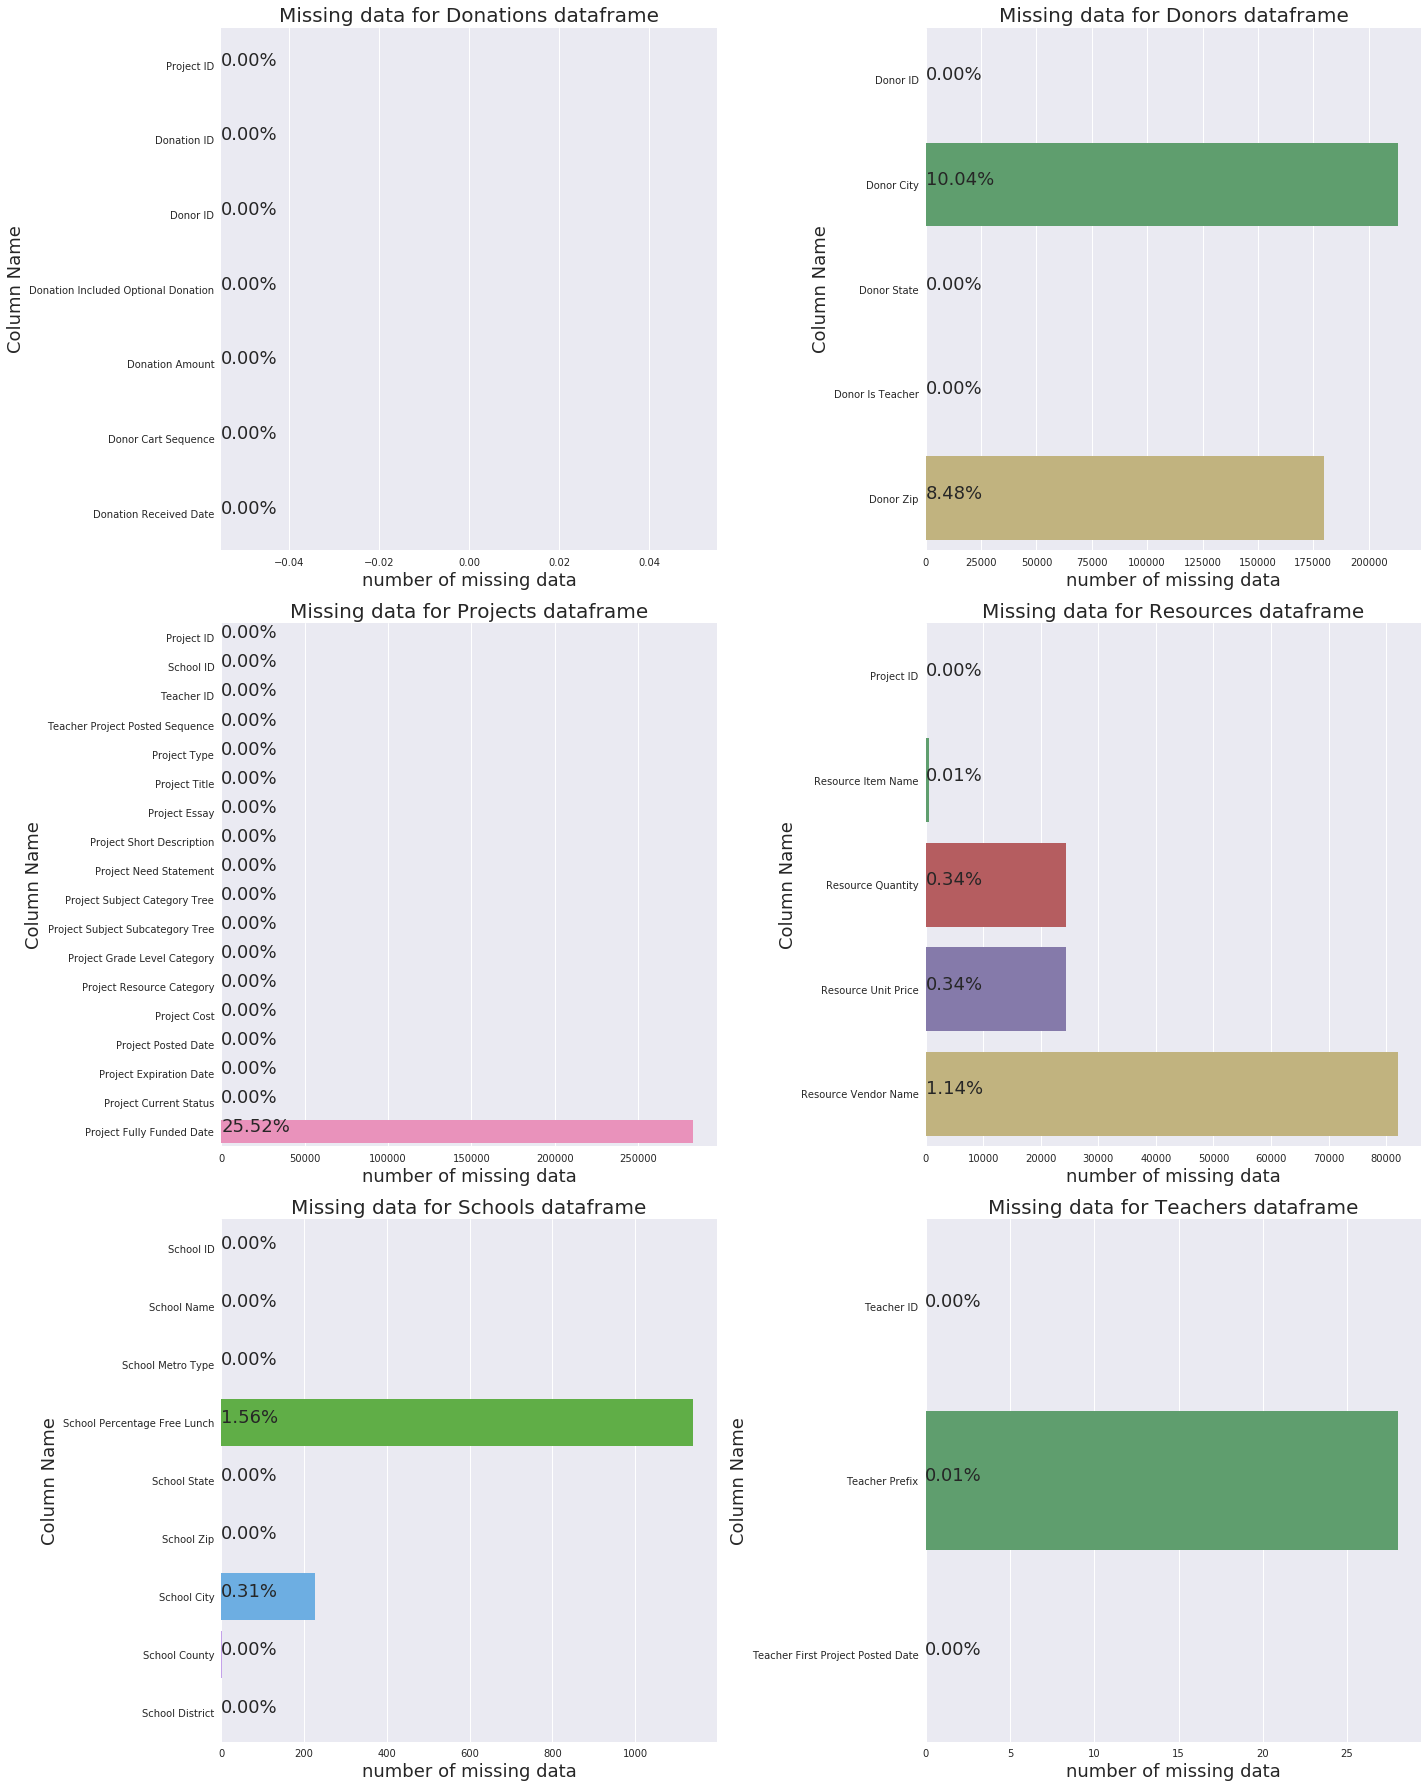

In [43]:
names = ['Donations','Donors','Projects','Resources','Schools','Teachers']
datum = [donations,donors,projects,resources,schools,teachers]
fig = plt.figure(figsize=(20,25))
for i,data in enumerate(datum):
    ax = fig.add_subplot(int(str(32)+str(i+1)))
    null_pct = data.isnull().sum()
    sns.barplot(null_pct.values,null_pct.index,ax = ax)

    for idx,value in enumerate(null_pct.values):
        ax.text(-0.055,idx,"{:.2f}%".format(float(value)/len(data)*100),fontsize=18)
    ax.set_xlabel("number of missing data",fontsize=18)
    ax.set_ylabel("Column Name",fontsize=18)
    ax.set_title("Missing data for {} dataframe".format(names[i]),fontsize=20)
    
plt.tight_layout()

# <a name="eda"></a>4. Elementary Data Analysis

## 4.1 Feature Distributions

### 4.1.1 Donation amounts

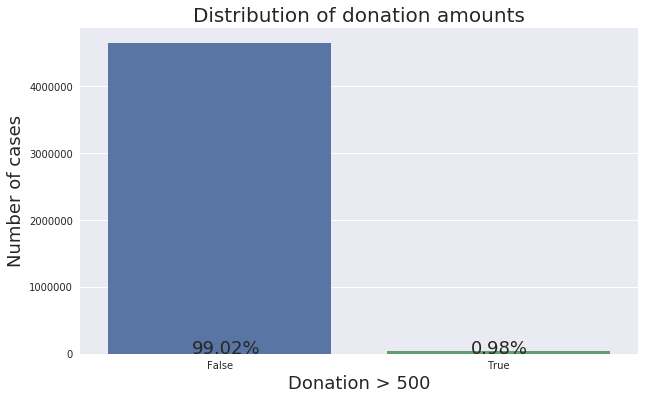

In [44]:
plt.figure(figsize=(10,6))
threshold = 500

temp = donations[["Donation Amount"]].dropna(inplace=False)
temp["large_amount"] = temp["Donation Amount"] > threshold
temp = temp.groupby(["large_amount"]).count().reset_index()
sns.barplot(x='large_amount',y='Donation Amount',data=temp)
plt.xlabel("Donation > {}".format(threshold),fontsize=18)
plt.ylabel("Number of cases",fontsize=18)
plt.title("Distribution of donation amounts",fontsize=20)
for i,v in enumerate(temp.large_amount.values):
    plt.text(i-0.1,0,"{:.2f}%".format(temp['Donation Amount'].values[i]/float(temp['Donation Amount'].sum())*100),fontsize=18)

It seems most of donations are less than 1000 dollars. We can focus on this range and see the distribution.

/homes/li2566/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,1,'Distribution of donation amounts')

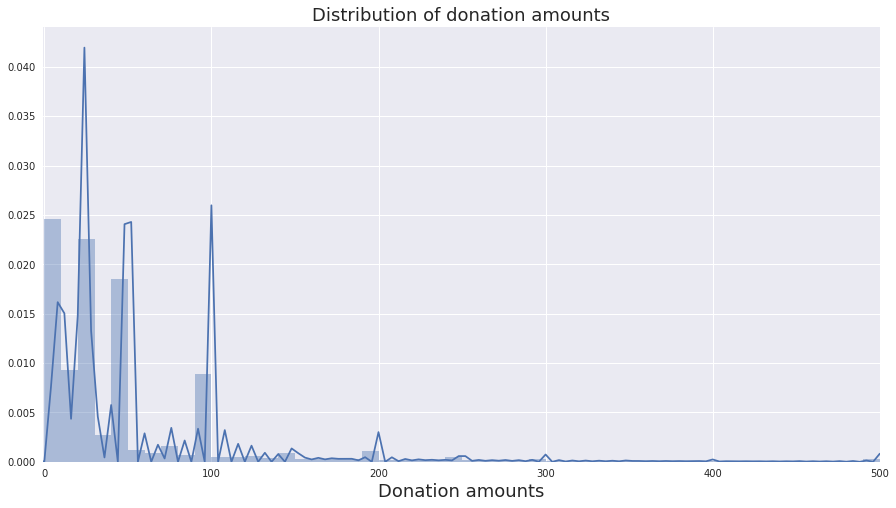

In [45]:
plt.figure(figsize=(15,8))
temp = filter(lambda x: x <= threshold,donations["Donation Amount"].dropna(inplace=False))
ax = sns.distplot(temp,bins=50)
ax.set_xlim([-1,threshold])
plt.xlabel("Donation amounts",fontsize=18)
plt.title("Distribution of donation amounts",fontsize=18)

We learn most of donations are about 20~30 dollars, then 50~60 dollars and <10 dollars.

### 4.1.2. Donation include optional donation

Text(0.5,1,'Donation Included Optional Donation')

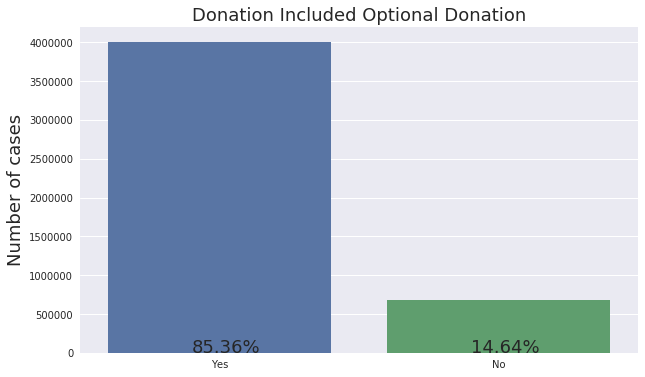

In [46]:
plt.figure(figsize=(10,6))
donation_optional = donations['Donation Included Optional Donation'].value_counts().reset_index()
sns.barplot(x='index',y='Donation Included Optional Donation',data=donation_optional)
for i,v in enumerate(donation_optional['Donation Included Optional Donation'].values):
    plt.text(i-0.1,0,"{:.2f}%".format(float(v)/donation_optional['Donation Included Optional Donation'].values.sum()*100),fontsize=18)
#plt.xticks(rotation=90)
plt.ylabel("Number of cases",fontsize=18)
plt.xlabel("")
plt.title("Donation Included Optional Donation",fontsize=18)

We know over 80% of donations include optional donation.

### 4.1.3. Donor Cart Sequence in Donation daraframe

Text(0.5,1,'Top 20 Donor Cart Sequence')

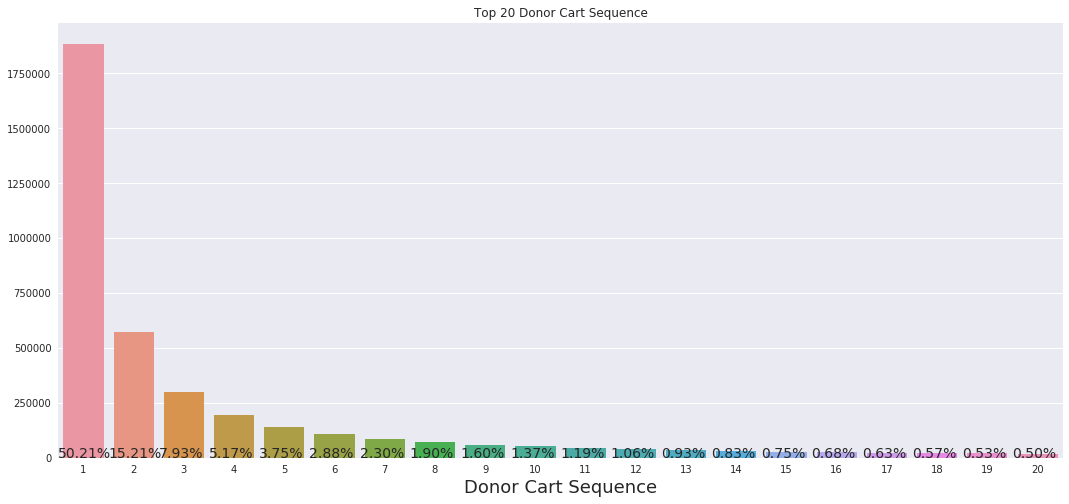

In [47]:
top = 20
plt.figure(figsize=(18,8))
donation_cart = donations['Donor Cart Sequence'].dropna().value_counts().reset_index()[:top]
sns.barplot(x='index',y='Donor Cart Sequence',data=donation_cart)
for i,v in enumerate(donation_cart['Donor Cart Sequence'].values):
    plt.text(i-0.5,0,"{:.2f}%".format(float(v)/donation_cart['Donor Cart Sequence'].values.sum()*100),fontsize=14)
#plt.xticks(rotation=90)
plt.ylabel("")
plt.xlabel("Donor Cart Sequence",fontsize=18)
plt.title("Top {} Donor Cart Sequence".format(top))

### 4.1.4. Teacher Project Posted Sequence

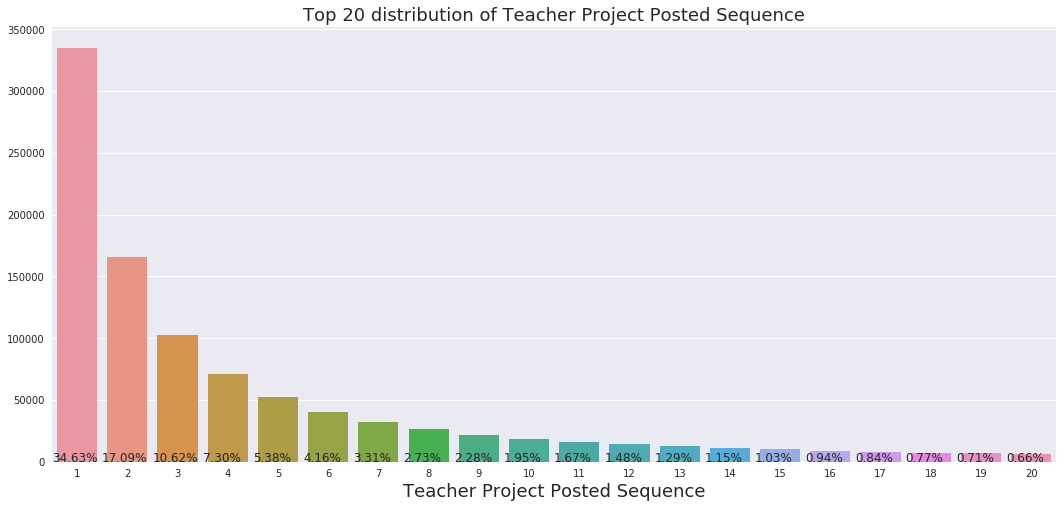

In [48]:
top = 20
temp = projects["Teacher Project Posted Sequence"].value_counts().sort_values(ascending=False)[:top]
plt.figure(figsize=(18,8))
sns.barplot(temp.index,temp.values)
plt.ylabel("")
plt.xlabel("Teacher Project Posted Sequence",fontsize=18)
plt.title("Top {} distribution of Teacher Project Posted Sequence".format(top),fontsize=18)
total = temp.sum()
for i,v in enumerate(temp):
    plt.text(i-0.5,0,"{:.2f}%".format(float(v)/total*100))

Since lack of description of "Teacher Project Posted Sequence", we don't know what it is. But we know the distribution is like exponential distribution.

### 4.1.4. Project Type

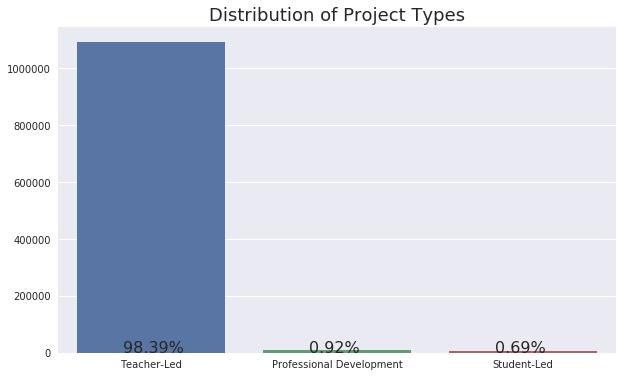

In [49]:
temp = projects["Project Type"].value_counts().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(y='Project Type',x='index',data=temp)
plt.ylabel("")
plt.xlabel("")
plt.title("Distribution of Project Types",fontsize=18)
total = temp["Project Type"].sum()
for i,v in enumerate(temp["Project Type"]):
    plt.text(i-0.15,0,"{:.2f}%".format(float(v)/total*100),fontsize=16)

It is obvious that most of projects are led by teachers.

### 4.1.5. Project Subject Category Tree

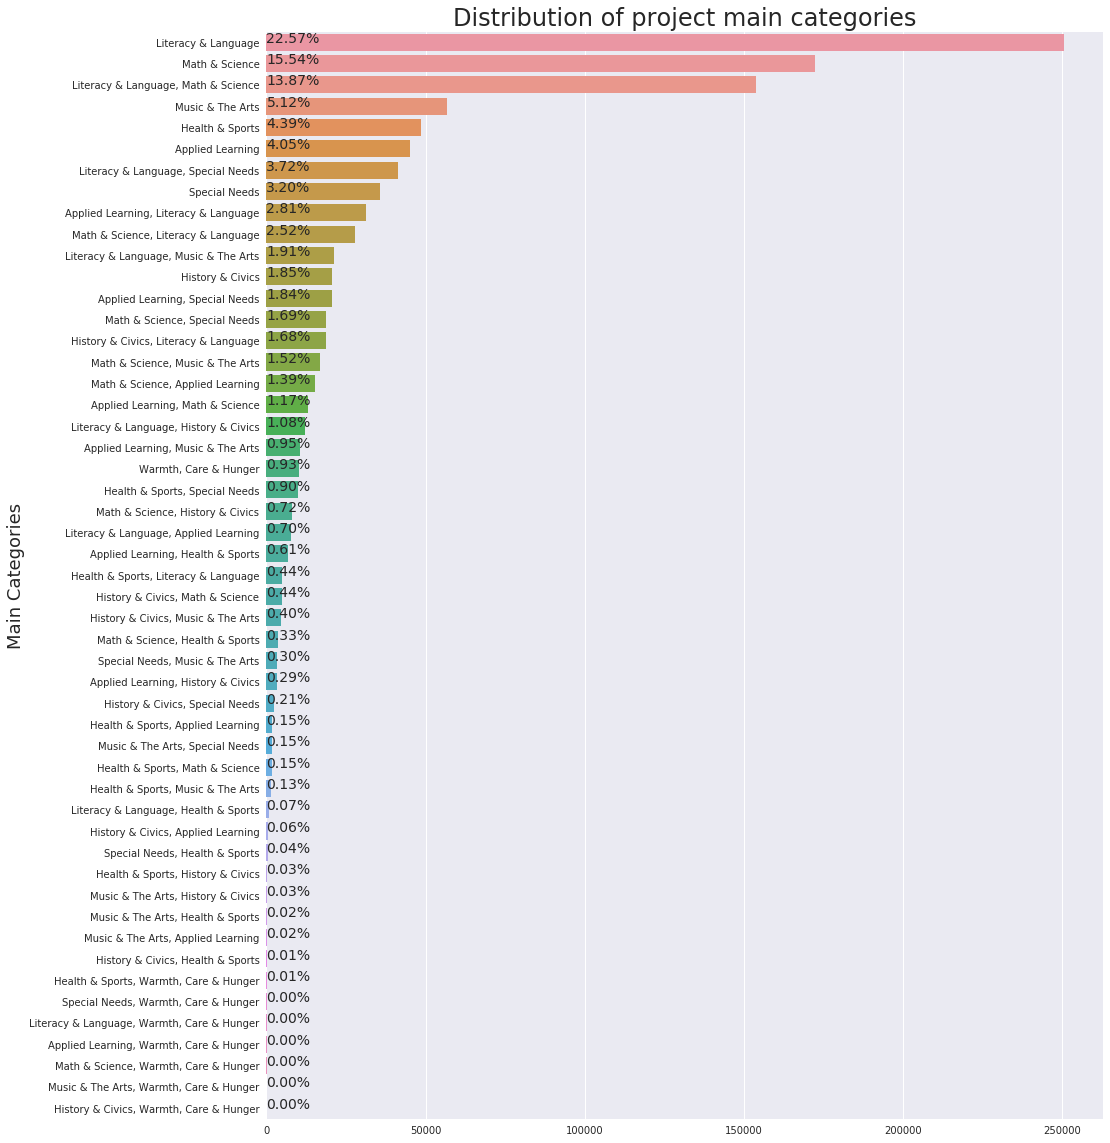

In [50]:
temp = projects['Project Subject Category Tree'].value_counts().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,20))
sns.barplot(x='Project Subject Category Tree',y='index',data=temp)
total = temp['Project Subject Category Tree'].sum()
plt.xlabel("")
plt.ylabel("Main Categories",fontsize=18)
plt.title("Distribution of project main categories",fontsize=24)
for i,v in enumerate(temp['Project Subject Category Tree']):
    plt.text(0,i,"{:.2f}%".format(float(v)/total*100),fontsize=14)

The top1 category is `"Literacy&Language"`, then `"Math&Science"` and `"Literacy&Language,Math&Science"`

### 4.1.6. Project Subject Subcategory Tree

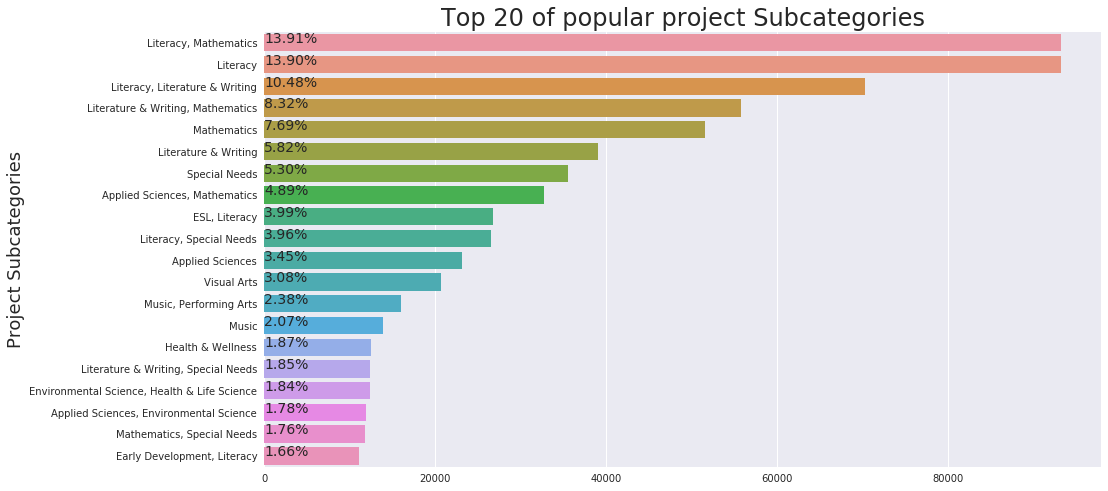

In [51]:
top = 20
temp = projects['Project Subject Subcategory Tree'].value_counts().sort_values(ascending=False).reset_index()[:top]
plt.figure(figsize=(15,8))
sns.barplot(x='Project Subject Subcategory Tree',y='index',data=temp)
total = temp['Project Subject Subcategory Tree'].sum()
plt.xlabel("")
plt.ylabel("Project Subcategories",fontsize=18)
plt.title("Top {} of popular project Subcategories".format(top),fontsize=24)
for i,v in enumerate(temp['Project Subject Subcategory Tree']):
    plt.text(0,i,"{:.2f}%".format(float(v)/total*100),fontsize=14)

Since too many subcategories, we take top 20 and learn that subcategories about literacy and mathematics are popular ones, which matches the statistics of the above result.

### 4.1.7. Project Grade Level Category

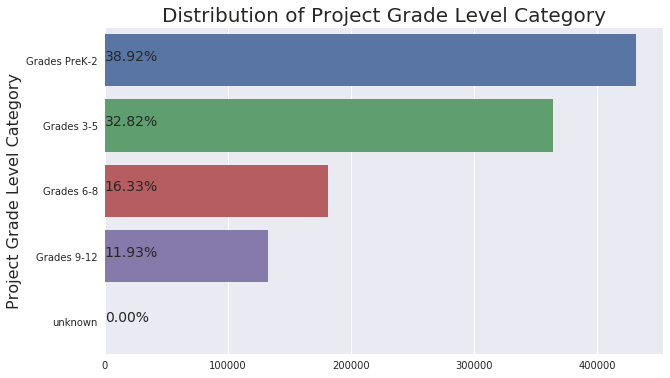

In [52]:

temp = projects['Project Grade Level Category'].value_counts().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Project Grade Level Category',y='index',data=temp)
total = temp['Project Grade Level Category'].sum()
plt.ylabel("Project Grade Level Category",fontsize=16)
plt.xlabel("")
plt.title("Distribution of Project Grade Level Category",fontsize=20)
for i,v in enumerate(temp['Project Grade Level Category']):
    plt.text(0,i,"{:.2f}%".format(float(v)/total*100),fontsize=14)

We learn most of projects focus on serving children under Grades 5.

### 4.1.8. Project Resource Category

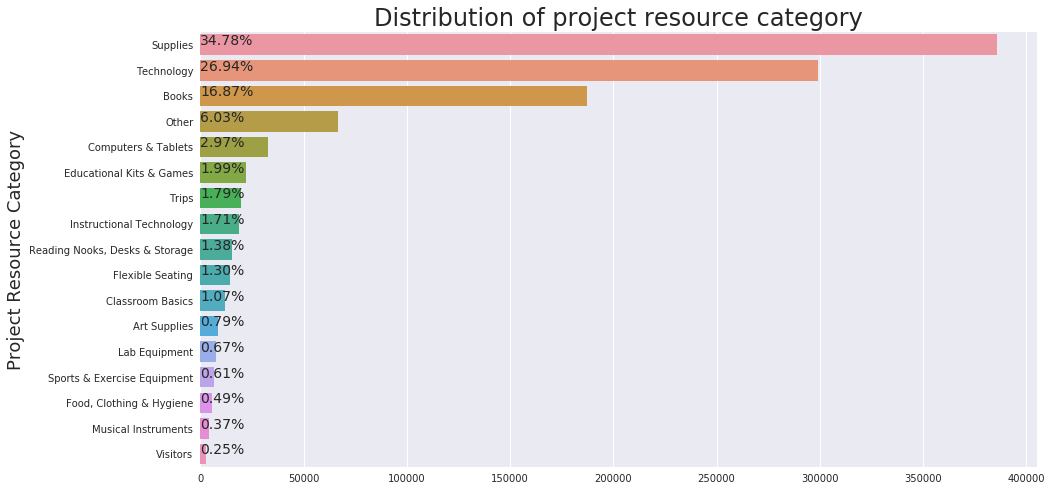

In [53]:
temp = projects['Project Resource Category'].value_counts().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x='Project Resource Category',y='index',data=temp)
total = temp['Project Resource Category'].sum()
plt.xlabel("")
plt.ylabel("Project Resource Category",fontsize=18)
plt.title("Distribution of project resource category",fontsize=24)
for i,v in enumerate(temp['Project Resource Category']):
    plt.text(0,i,"{:.2f}%".format(float(v)/total*100),fontsize=14)

Most of projects require resources from supplies and technology.

### 4.1.9. Project Cost

/homes/li2566/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,1,'Distribution of project costs')

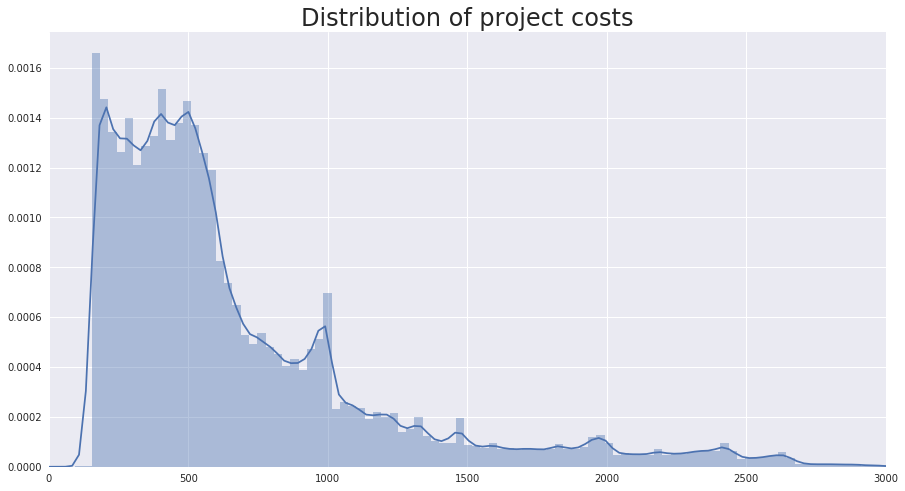

In [54]:
threshold = 3000
temp = projects[['Project Cost']]
plt.figure(figsize=(15,8))
sns.distplot(temp[temp['Project Cost'] < threshold],bins=100)
plt.xlim([0,3001])
plt.title("Distribution of project costs",fontsize=24)

We learn most of costs are under $600.

### 4.1.10. Project Current Status

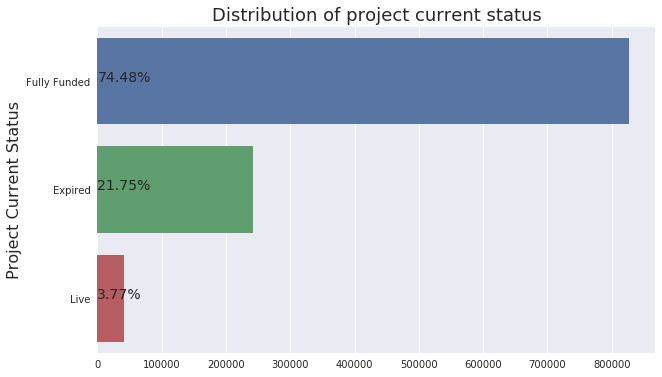

In [55]:
temp = projects['Project Current Status'].value_counts().sort_values(ascending=False).reset_index()[:20]
plt.figure(figsize=(10,6))
sns.barplot(x='Project Current Status',y='index',data=temp)
total = temp['Project Current Status'].sum()
plt.xlabel("")
plt.ylabel("Project Current Status",fontsize=16)
plt.title("Distribution of project current status",fontsize=18)
for i,v in enumerate(temp['Project Current Status']):
    plt.text(0,i,"{:.2f}%".format(float(v)/total*100),fontsize=14)

2 thirds of projects are well-funded and a fifth is expired.

### 4.1.11. Donors location

In [56]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'District of Columbia': 'DC',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}
donors_state = donors['Donor State'].value_counts().drop('other',axis=0)
data = [dict(
        type = "choropleth",
        #locations = donors_state.index.str,
        locations = donors_state.index.map(lambda x: us_state_abbrev[x]),
        locationmode = 'USA-states',
        z = donors_state.values,
        #text = donors_state.index,
        colorscale = 'Red',
        marker = dict(line=dict(width=0.7)),
        colorbar = dict(title='Number of donors')
    )]
layout = dict(
        title = 'Number of donors distribution across states',
        geo = dict(
            scope='usa',
            showframe = False,
            showcoastlines = True,
            projection=dict( type='albers usa' ),
        )
    )
#fig = go.Figure(data=data, layout=layout)
#offline.image.save_as(fig, filename='donor-state.png')
fig = dict(data=data, layout=layout)
offline.plot(fig,filename='donor-state.html',auto_open=False)

'file:///u/antor/u50/li2566/Projects/DonorsChoose/donor-state.html'

In [89]:
from IPython.core.display import display,HTML
display(HTML(filename='donor-state.html'))

### 4.1.12. Donor is teacher

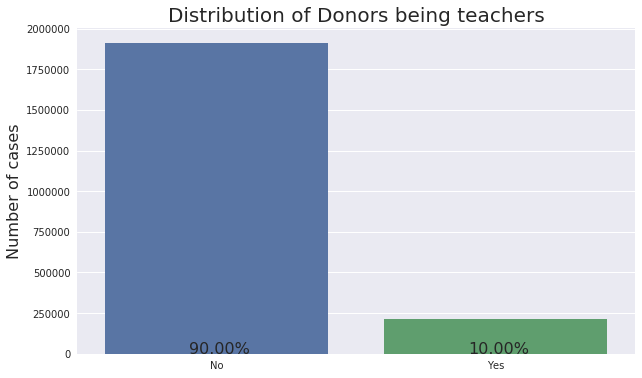

In [58]:
donor_teacher = donors['Donor Is Teacher'].value_counts().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='index',y='Donor Is Teacher',data=donor_teacher)
total = donor_teacher['Donor Is Teacher'].sum()
plt.xlabel("")
plt.ylabel("Number of cases",fontsize=16)
plt.title("Distribution of Donors being teachers",fontsize=20)
for i,v in enumerate(donor_teacher['Donor Is Teacher']):
    plt.text(i-0.1,0,"{:.2f}%".format(float(v)/total*100),fontsize=16)

only 10% of donors are teachers.

### 4.1.13. Resources costs

In [59]:
temp = resources[~resources['Resource Quantity'].isnull() & ~resources['Resource Unit Price'].isnull()][['Resource Quantity','Resource Unit Price']]
temp['Resource Quantity'] = temp['Resource Quantity'].astype(float)
temp['Resource Unit Price'] = temp['Resource Unit Price'].astype(float)
temp['total_cost'] = temp['Resource Quantity'].mul(temp['Resource Unit Price'])

# 
threshold = 1000
print("Number of resources is {}".format(len(temp)))
print("Number of resources greater than {} is {}".format(threshold,(temp['total_cost'] > threshold).sum()))

Number of resources is 7186136
Number of resources greater than 1000 is 81452


We know most of resources cost are less than \$1000. we then only focus on those whose costs are less than \$1000.

/homes/li2566/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,1,'Distribution of total resource costs')

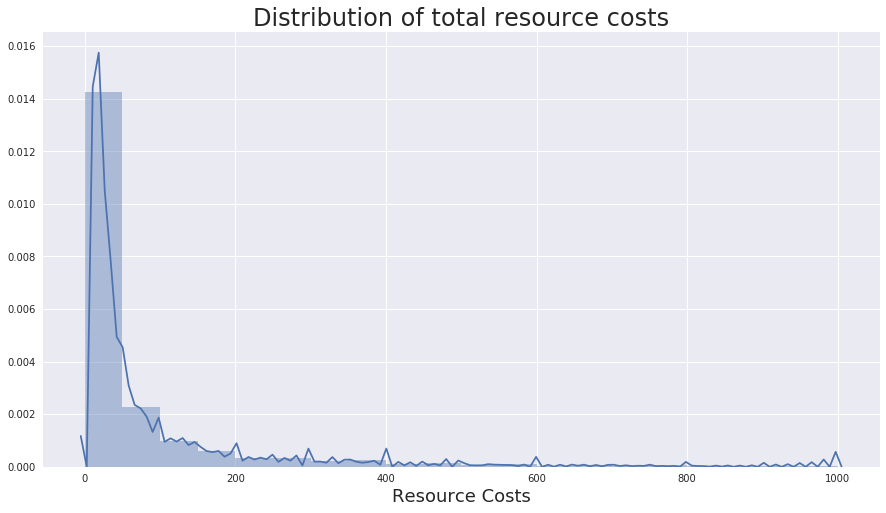

In [60]:
temp = temp[temp['total_cost'] <= 1000]
plt.figure(figsize=(15,8))
sns.distplot(temp['total_cost'],bins=20)
plt.xlabel("Resource Costs",fontsize=18)
plt.title("Distribution of total resource costs",fontsize=24)

Most of resources cost are less than \$100.

### 4.1.14. School Type

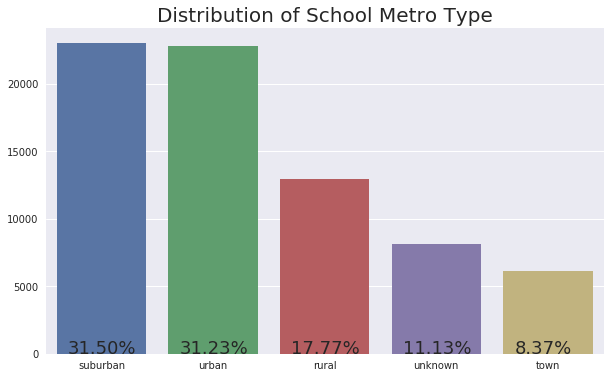

In [61]:
school_type = schools['School Metro Type'].value_counts().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='index',y='School Metro Type',data=school_type)
plt.title("Distribution of School Metro Type",fontsize=20)
plt.xlabel("")
plt.ylabel("")
total = school_type['School Metro Type'].sum()
for i,v in enumerate(school_type['School Metro Type']):
    plt.text(i-0.3,0,"{:.2f}%".format(float(v)/total*100),fontsize=18)

Most of schools getting donations are suburban and urban types.

### 4.1.15. Percentage of free lunch for schools

/homes/li2566/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,1,'Distribution of percentage of school free lunch')

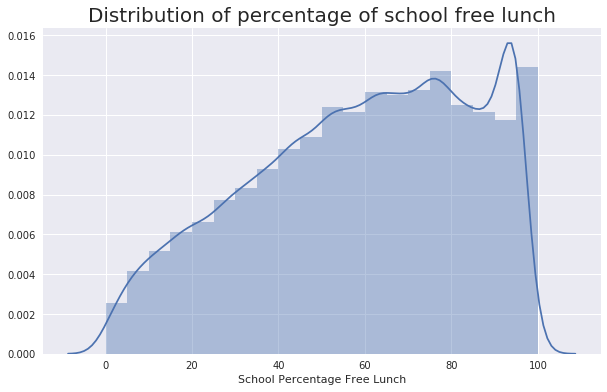

In [62]:
plt.figure(figsize=(10,6))
sns.distplot(schools["School Percentage Free Lunch"].dropna(),bins=20)
plt.title("Distribution of percentage of school free lunch",fontsize=20)

### 4.1.16. School Locations

In [90]:
school_state = schools['School State'].dropna().value_counts()
data = [dict(
        type = "choropleth",
        #locations = donors_state.index.str,
        locations = school_state.index.map(lambda x: us_state_abbrev[x]),
        locationmode = 'USA-states',
        z = school_state.values,
        colorscale = 'Blue',
        marker = dict(line=dict(width=0.7)),
        colorbar = dict(title='Number of schools across states')
    )]
layout = dict(
        title = 'Number of schools across states',
        geo = dict(
            scope='usa',
            showframe = False,
            showcoastlines = True,
            projection=dict( type='albers usa' ),
        )
    )
fig = dict(data=data, layout=layout)
offline.plot(fig,filename='school-state.html',auto_open=False)

'file:///u/antor/u50/li2566/Projects/DonorsChoose/school-state.html'

In [91]:
display(HTML(filename='school-state.html'))

### 4.1.17. Gender of Teachers

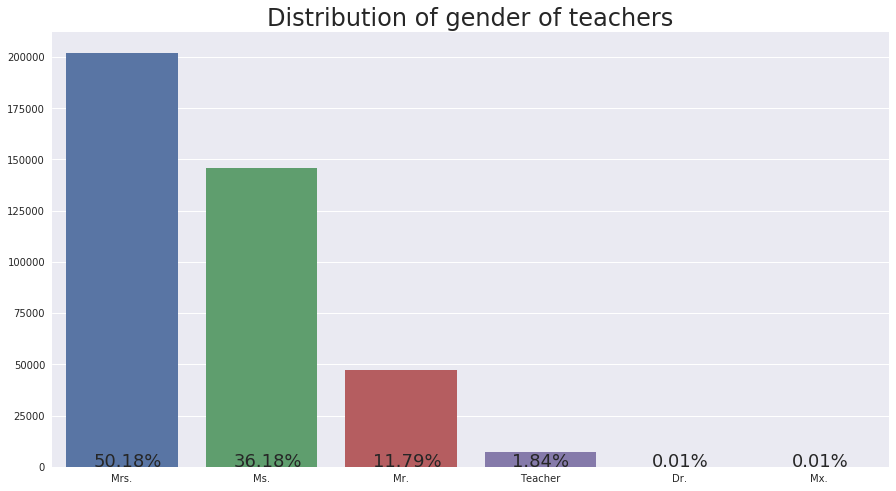

In [64]:
teacher_gender = teachers['Teacher Prefix'].dropna().value_counts().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x='index',y='Teacher Prefix',data=teacher_gender)
plt.xlabel("")
plt.ylabel("")
total = teacher_gender['Teacher Prefix'].sum()
plt.title("Distribution of gender of teachers",fontsize=24)
for i,v in enumerate(teacher_gender['Teacher Prefix']):
    plt.text(i-0.2,0,"{:.2f}%".format(float(v)/total*100),fontsize=18)

It seems most of teachers are females.

### 4.1.18. Distribution of Donor's City 

In [65]:
donors_location = donors[donors['Donor State'] != 'other'][['Donor City','Donor State']]
donors_location = donors_location.loc[~donors_location['Donor City'].isnull(),]
donors_city = donors_location['Donor City'].astype(str) + ', ' + donors_location['Donor State'].astype(str)
donors_city = donors_city.value_counts().sort_values(ascending=False)[:100].to_frame()
donors_city.columns = ['Count']
donors_city.head()

Count
Chicago, Illinois          33726
New York, New York         26820
Brooklyn, New York         21715
Los Angeles, California    17922
San Francisco, California  16553

In [88]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()

# Get the location of each city and plot it
for city in donors_city.index:
    loc = geolocator.geocode(city)
    if loc:
        donors_city.loc[city,'lon'] = loc.longitude
        donors_city.loc[city,'lat'] = loc.latitude
donors_city.head()

Count        lon        lat
Chicago, Illinois          33726 -87.624421  41.875555
New York, New York         26820 -73.986614  40.730646
Brooklyn, New York         21715 -73.949582  40.650104
Los Angeles, California    17922 -84.117211   9.997099
San Francisco, California  16553 -73.367615   8.654539

In [93]:
text = donors_city.index.astype(str) + ', Number of donors: ' + donors_city.Count.astype(str)
data = [dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = donors_city.lon,
        lat = donors_city.lat,
        text = text,
        mode = 'markers',
        marker = dict(
            size = donors_city.Count.div(1000),
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            #symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            cmin = 0,
            color = donors_city.Count,
            cmax = max(donors_city.Count),
            colorbar=dict(
                title="Number of donors"
            )
        ))]

layout = dict(
        title = 'Distribution of donors across states',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict(data=data, layout=layout)
offline.plot(fig,filename='donor-city.html',auto_open=False)

'file:///u/antor/u50/li2566/Projects/DonorsChoose/donor-city.html'

In [94]:
display(HTML(filename='donor-city.html'))

### 4.1.19. Top Resource Vendors

/homes/li2566/.local/lib/python2.7/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/homes/li2566/.local/lib/python2.7/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



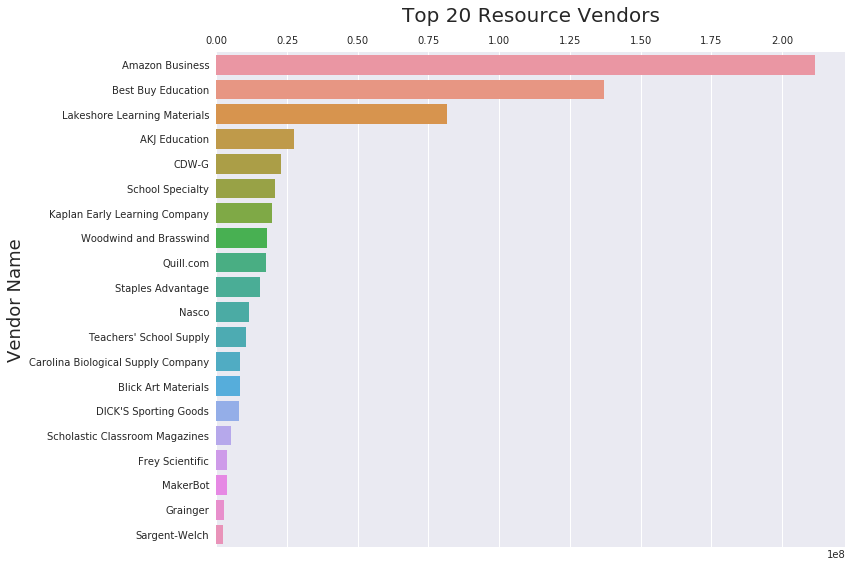

In [67]:
top = 20
temp = resources[~resources['Resource Vendor Name'].isnull()]
temp.loc[:,'total_costs'] = temp['Resource Quantity'].mul(temp['Resource Unit Price'])
temp = temp.groupby('Resource Vendor Name')['total_costs'].sum().sort_values(ascending=False)[:20].reset_index()
plt.figure(figsize=(12,8))
ax = sns.barplot(y='Resource Vendor Name',x='total_costs',data=temp)
plt.title("Top {} Resource Vendors".format(top),fontsize=20,y=1.05)
plt.ylabel("Vendor Name",fontsize=18)
plt.xlabel("")
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()
plt.tight_layout()

### 4.1.20. Top Keywords from Project Title

### 4.1.21. Top Keywords from Project Essay

### 4.1.22. Top Keywords from Project Short Description

### 4.1.22. Top Keywords from Project Need Statement

# 5. More Exploratory Data Analysis

## 5.1. Data Consistency

In this section we will check the consistency between data we have.

### 5.1.1. Well-fundedness of Projects

From "project" and "resource" dataframe, we check if the projects are fully funded and if the existence of fully funded date really reflect its fully-fundedness 

In [95]:
gc.collect()

simplified_donation = donations[['Donation Amount','Project ID']].groupby("Project ID").sum().reset_index()
merged = projects.merge(simplified_donation,
                       how='inner',
                       on='Project ID')
merged['Donation Amount'] = merged['Donation Amount'].astype(float)
merged['funding_gap'] = merged['Project Cost'].subtract(merged['Donation Amount'])
merged.head()

Project ID                         School ID  \
0  7685f0265a19d7b52a470ee4bac883ba  e180c7424cb9c68cb49f141b092a988f   
1  f9f4af7099061fb4bf44642a03e5c331  08b20f1e2125103ed7aa17e8d76c71d4   
2  afd99a01739ad5557b51b1ba0174e832  1287f5128b1f36bf8434e5705a7cc04d   
3  c614a38bb1a5e68e2ae6ad9d94bb2492  900fec9cd7a3188acbc90586a09584ef   
4  ec82a697fab916c0db0cdad746338df9  3b200e7fe3e6dde3c169c02e5fb5ae86   

                         Teacher ID  Teacher Project Posted Sequence  \
0  4ee5200e89d9e2998ec8baad8a3c5968                               25   
1  cca2d1d277fb4adb50147b49cdc3b156                                3   
2  6c5bd0d4f20547a001628aefd71de89e                                1   
3  8ed6f8181d092a8f4c008b18d18e54ad                               40   
4  893173d62775f8be7c30bf4220ad0c33                                2   

  Project Type                                      Project Title  \
0  Teacher-Led             Stand Up to Bullying: Together We Can!   
1  Teacher-Led                                 Learning in Color!   
2  Teacher-Led  Help Second Grade ESL Students Develop Languag...   
3  Teacher-Led  Help Bilingual Students Strengthen Reading Com...   
4  Teacher-Led                   Help Us Make Each Minute Count!    

                                       Project Essay  \
0  Did you know that 1-7 students in grades K-12 ...   
1  Help us have a fun, interactive listening cent...   
2  Visiting or moving to a new place can be very ...   
3  Students at our school are still working hard ...   
4  "Idle hands" were something that Issac Watts s...   

                           Project Short Description  \
0  Did you know that 1-7 students in grades K-12 ...   
1  Help us have a fun, interactive listening cent...   
2  Visiting or moving to a new place can be very ...   
3  Students at our school are still working hard ...   
4  "Idle hands" were something that Issac Watts s...   

                              Project Need Statement  \
0  My students need 25 copies of "Bullying in Sch...   
1  My students need a listening center, read alon...   
2  My students need beginning vocabulary audio ca...   
3  My students need one copy of each book in The ...   
4  My students need items such as Velcro, two pou...   

           Project Subject Category Tree  \
0                       Applied Learning   
1  Applied Learning, Literacy & Language   
2                    Literacy & Language   
3                    Literacy & Language   
4                          Special Needs   

         Project Subject Subcategory Tree Project Grade Level Category  \
0  Character Education, Early Development                Grades PreK-2   
1             Early Development, Literacy                Grades PreK-2   
2                                     ESL                Grades PreK-2   
3                           ESL, Literacy                   Grades 3-5   
4                           Special Needs                   Grades 3-5   

  Project Resource Category  Project Cost Project Posted Date  \
0                Technology        361.80          2013-01-01   
1                Technology        512.85          2013-01-01   
2                  Supplies        435.92          2013-01-01   
3                     Books        161.26          2013-01-01   
4                  Supplies        264.19          2013-01-01   

  Project Expiration Date Project Current Status Project Fully Funded Date  \
0              2013-05-30           Fully Funded                2013-01-11   
1              2013-05-31                Expired                       NaN   
2              2013-05-30           Fully Funded                2013-05-22   
3              2013-05-31           Fully Funded                2013-02-06   
4              2013-05-30           Fully Funded                2013-01-01   

   Donation Amount  funding_gap  
0           230.50       131.30  
1            29.00       483.85  
2           426.21         9.71  
3           161.26   

By peeking the dataframe we know there are many projects which are fully funded but there exists funding gap.

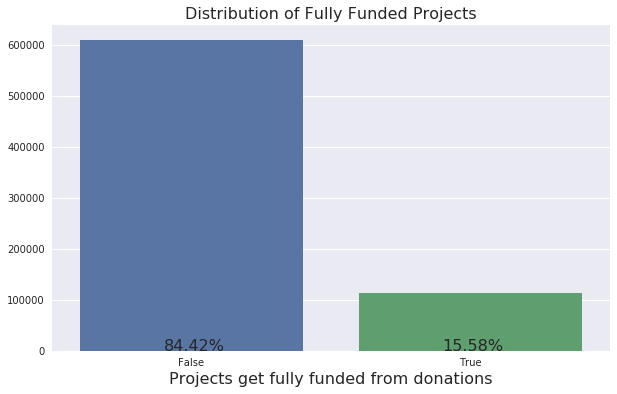

In [96]:
temp = merged[merged['Project Current Status'] == 'Fully Funded'][['Project Current Status','funding_gap']]
temp['well_funded'] = (temp['funding_gap'] <= 0)
counts = temp['well_funded'].value_counts().reset_index()
total = counts['well_funded'].sum()
plt.figure(figsize=(10,6))
sns.barplot(x='index',y='well_funded',data=counts)
plt.xlabel("Projects get fully funded from donations",fontsize=16)
plt.ylabel("")
plt.title("Distribution of Fully Funded Projects",fontsize=16)
for i,v in enumerate(counts['well_funded']):
    plt.text(i-0.1,0,"{:.2f}%".format(float(v)/total*100),fontsize=16)

Over 80% of projects that claim fully-fundedness are not fully funded from donations only. Now we plot the distribution of funding gaps, regardless whether their status.

/homes/li2566/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,1,'Distribution of funding gaps between 0 and 1000')

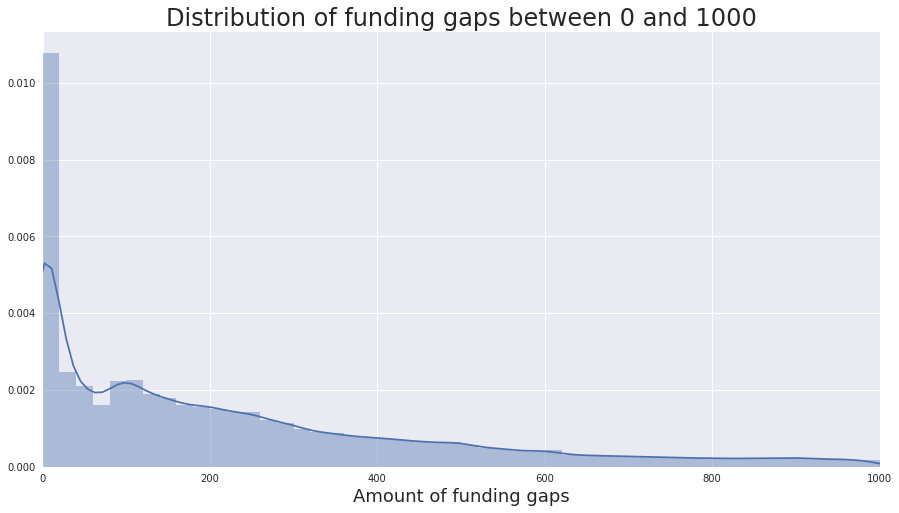

In [97]:
gc.collect()
lb,ub = 0,1000
temp = merged[(lb <= merged['funding_gap']) & (merged['funding_gap'] < ub)]['funding_gap']
plt.figure(figsize=(15,8))
sns.distplot(temp,bins = 50)
plt.xlim([0,1000])
plt.xlabel("Amount of funding gaps",fontsize=18)
plt.title("Distribution of funding gaps between {} and {}".format(lb,ub),fontsize=24)

From the above histogram we know most of gaps are within $20.

### 5.1.2. Gaps between costs and resources

In [70]:
simplified_src = resources[['Project ID','Resource Quantity','Resource Unit Price']]
simplified_src['resource_prices'] = simplified_src['Resource Quantity'].mul(simplified_src['Resource Unit Price'])
simplified_src = simplified_src[['Project ID','resource_prices']].groupby('Project ID').sum().reset_index()
merged = projects.merge(simplified_src,
                       how = 'inner',
                       on = 'Project ID')
merged['excess_cost'] = merged['Project Cost'].subtract(merged['resource_prices'])
merged['have_excess_cost'] = (merged['excess_cost'] > 0)

/u/antor/u50/li2566/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



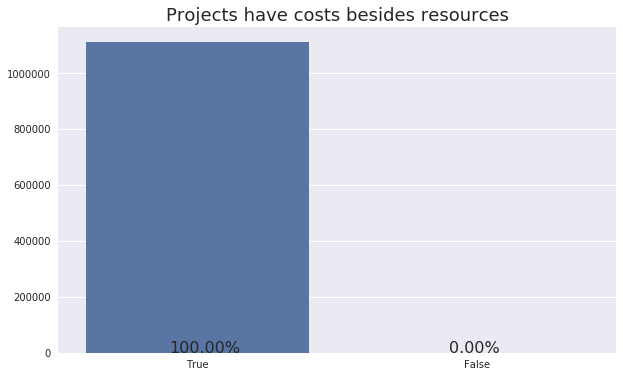

In [72]:
temp = merged['have_excess_cost'].value_counts().reset_index()
total = temp['have_excess_cost'].sum()
plt.figure(figsize=(10,6))
sns.barplot(x='index',y='have_excess_cost',data=temp,order=[True,False])
plt.title("Projects have costs besides resources",fontsize=18)
plt.xlabel("")
plt.ylabel("")
for i,v in enumerate(temp['have_excess_cost']):
    plt.text(i-0.1,0,"{:.2f}%".format(float(v)/total*100),fontsize=16)

Almost all of projects have excess costs besides resource costs.

# 6. Time Series Analysis

The raw data contains time data like **Donation Received Date**,**Project Expiration Date**,**Project Posted Date**,**Teacher First Project Posted Date**. In this section we will use some time series analysis techniques trying to mine nontrivial information.

## 6.1 Time Series Visualization

### 6.1.1. Project Posted vs. Expired Date

Text(0.5,1,'Trend of Posted and Expired Projects')

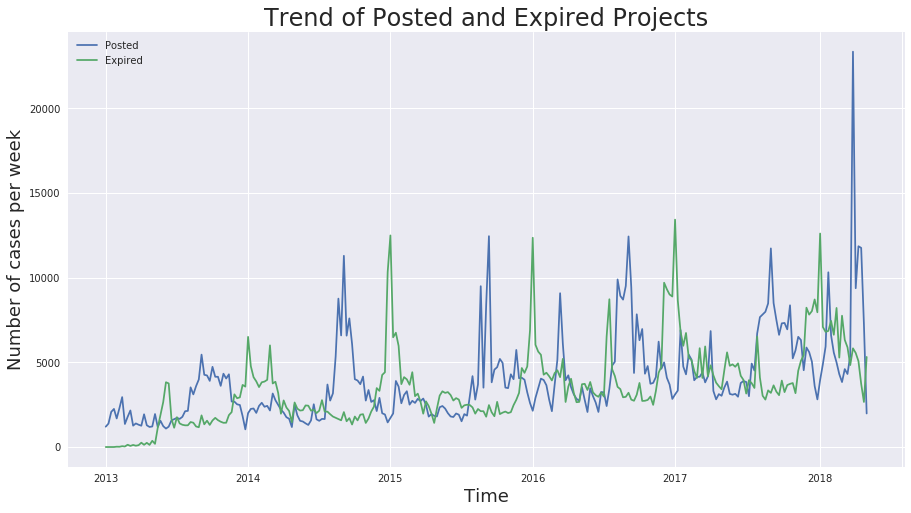

In [73]:
left = pd.to_datetime(projects['Project Posted Date']).to_frame()
left.loc[:,'posted_count'] = 1
left.sort_values(by='Project Posted Date',inplace=True)
left.set_index(keys='Project Posted Date',inplace=True)
left = left.resample('W').count()
left.set_index(left.index.to_period(freq='W'),inplace=True)

right = pd.to_datetime(projects['Project Expiration Date']).to_frame()
right.loc[:,'expired_count'] = 1
right.sort_values(by='Project Expiration Date',inplace=True)
right.set_index(keys='Project Expiration Date',inplace=True)
right = right.resample('W').count()
right.set_index(right.index.to_period(freq='W'),inplace=True)

merged = left.merge(right,left_index=True,right_index=True)
merged.head()
merged.plot(figsize=(15,8))
plt.xlabel('Time',fontsize=18)
plt.ylabel('Number of cases per week',fontsize=18)
plt.legend(['Posted','Expired'])
plt.title("Trend of Posted and Expired Projects",fontsize=24)

We learn clear seasonalities for both posted and expired projects, and we see the expired pattern is like a shifted one of posted. We will analyze it later.

### 6.1.2. Project Fully Funded Date

Text(0.5,1,'Trend of Fully Funded Projects')

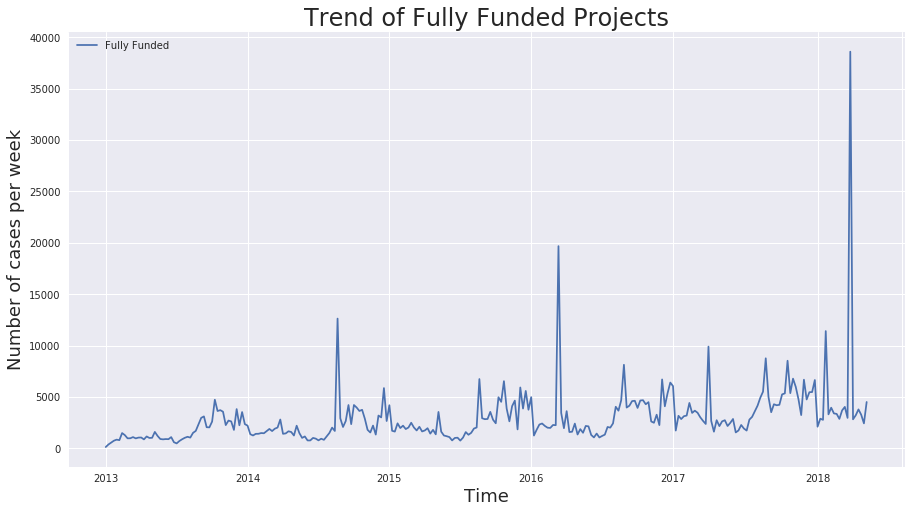

In [74]:
temp = pd.to_datetime(projects['Project Fully Funded Date']).to_frame()
temp.loc[:,'count'] = 1
temp.sort_values(by='Project Fully Funded Date',inplace=True)
temp.set_index(keys='Project Fully Funded Date',inplace=True)
temp = temp.resample('W').count()
temp.set_index(temp.index.to_period(freq='W'),inplace=True)
temp.plot(figsize=(15,8))
plt.xlabel('Time',fontsize=18)
plt.ylabel('Number of cases per week',fontsize=18)
plt.legend(['Fully Funded'])
plt.title("Trend of Fully Funded Projects",fontsize=24)

Although not obvious, there exists some seasonality in the series.

### 6.1.3. Teacher First Project Posted Date

Text(0.5,1,'Trend of number of teachers first posting project')

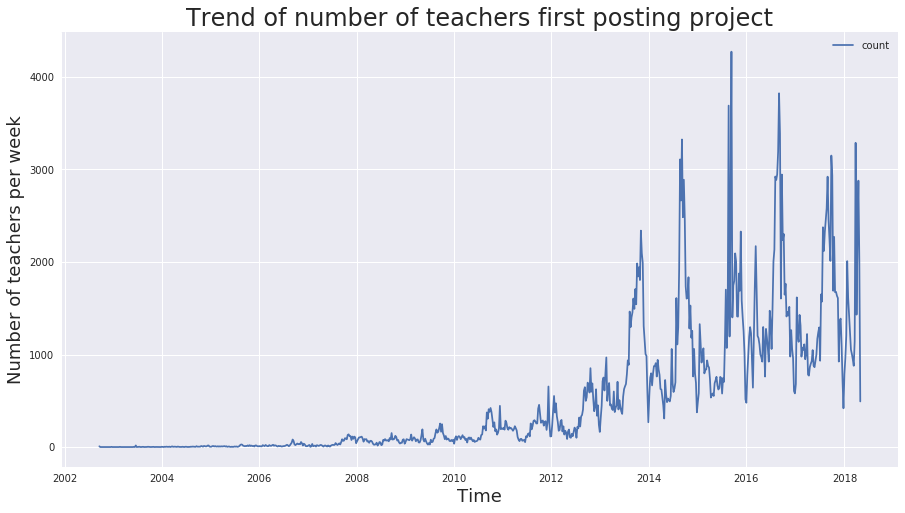

In [75]:
temp = pd.to_datetime(teachers['Teacher First Project Posted Date']).to_frame()
temp.loc[:,'count'] = 1
temp.sort_values(by='Teacher First Project Posted Date',inplace=True)
temp.set_index(keys='Teacher First Project Posted Date',inplace=True)
#temp.head()
temp = temp.resample('W').count()
temp.set_index(temp.index.to_period(freq='W'),inplace=True)
temp.plot(figsize=(15,8))
plt.xlabel('Time',fontsize=18)
plt.ylabel('Number of teachers per week',fontsize=18)
plt.title("Trend of number of teachers first posting project",fontsize=24)

As we expect, the number of teachers involved in DonorsChoose is increasing each year.

### 6.1.4. Donations

We assume **Donation Received Date** is the actual donation, although they should be very close.

### 6.1.4.1 Donation Amounts and Counts

In [76]:
temp = donations[['Donation Amount','Donation Received Date']]
temp.loc[:,'Donation Received Date'] = pd.to_datetime(temp['Donation Received Date'])
temp.sort_values(by='Donation Received Date',inplace=True)
temp.set_index(keys='Donation Received Date',inplace=True)
temp = temp.resample('W').agg(['sum','count'])
temp.set_index(temp.index.to_period(freq='W'),inplace=True)
temp.columns = temp.columns.droplevel(0)

/u/antor/u50/li2566/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



For the number of donations, the trend is increasing, while there is no significant trend for average amount of donations.

Text(0.5,1,'Trend of Donations Amounts')

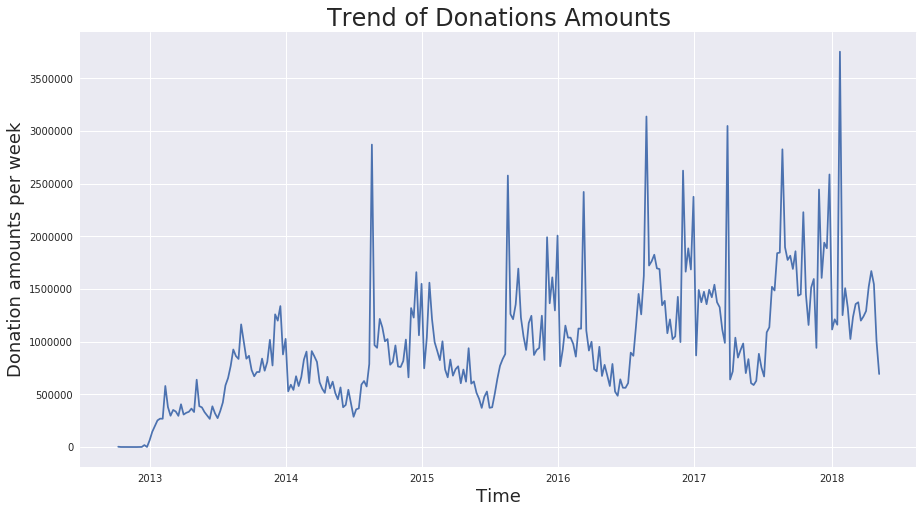

In [77]:
ax1 = temp['sum'].plot(figsize=(15,8))
plt.xlabel('Time',fontsize=18)
plt.ylabel('Donation amounts per week',fontsize=18)
plt.title("Trend of Donations Amounts",fontsize=24)

Text(0.5,1,'Trend of Donations Counts')

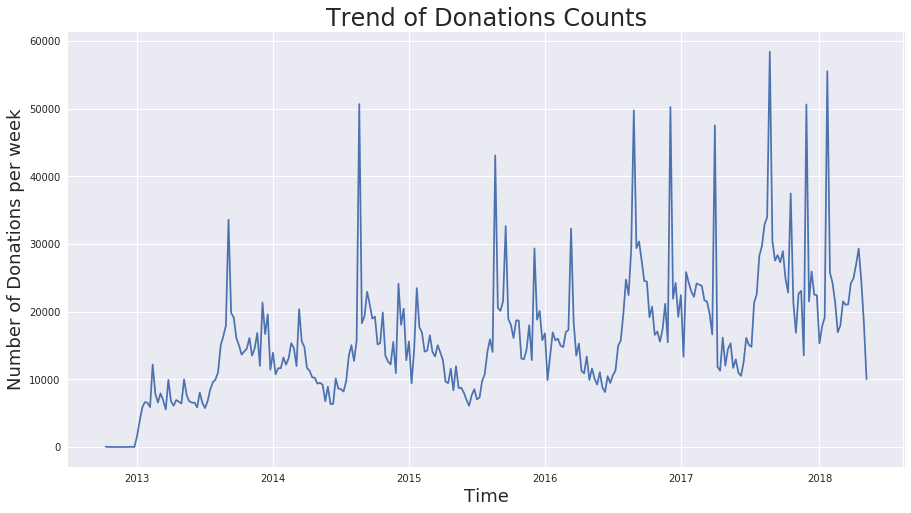

In [78]:
ax1 = temp['count'].plot(figsize=(15,8))
plt.xlabel('Time',fontsize=18)
plt.ylabel('Number of Donations per week',fontsize=18)
plt.title("Trend of Donations Counts",fontsize=24)

Pattern exists at both of above graphs, we will explore it later.

### 6.1.4.2 Donation Counts and Average by Month

Just in case, we do some summaries of donation by month and weekdays.

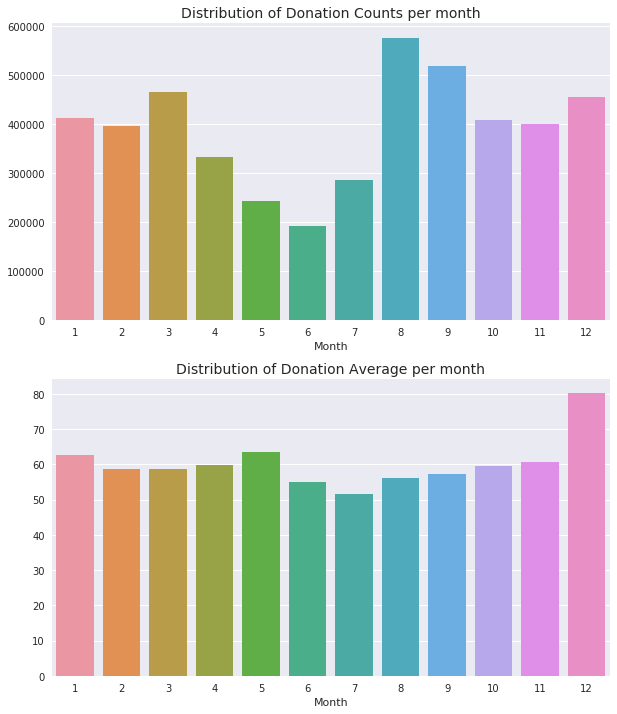

In [79]:
temp = donations[['Donation Amount','Donation Received Date']]
temp.loc[:,'Donation Received Date'] = pd.to_datetime(temp['Donation Received Date'])
temp.loc[:,'Month'] = temp['Donation Received Date'].dt.month
count_mean = temp.groupby('Month')['Donation Amount'].agg(['count','mean']).sort_index()
count_mean.rename(columns={'count':'Counts','mean':'Average'},inplace=True)
fig = plt.figure(figsize=(10,12))
for idx,col in enumerate(count_mean.columns):
    ax = fig.add_subplot(int(str(21)+str(idx+1)))
    sns.barplot(x=count_mean.index,y=col,data=count_mean,ax=ax)
    ax.set_title("Distribution of Donation {} per month".format(col),fontsize=14)
    plt.ylabel("")

### 6.1.4.3 Donation Counts and Average by Weekday

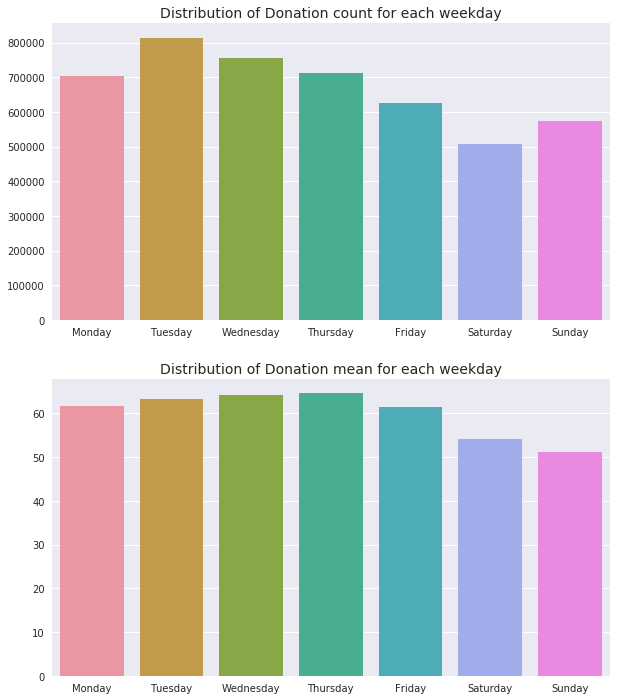

In [80]:
temp = donations[['Donation Amount','Donation Received Date']]
temp.loc[:,'Donation Received Date'] = pd.to_datetime(temp['Donation Received Date'])
temp.loc[:,'Month'] = temp['Donation Received Date'].dt.weekday
count_mean = temp.groupby('Month')['Donation Amount'].agg(['count','mean']).sort_index()
count_mean.rename(columns={'count':'Counts','mean':'Average'})
count_mean.rename(index={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'},inplace=True)
fig = plt.figure(figsize=(10,12))
for idx,col in enumerate(count_mean.columns):
    ax = fig.add_subplot(int(str(21)+str(idx+1)))
    sns.barplot(count_mean.index,count_mean[col],ax=ax)
    ax.set_title("Distribution of Donation {} for each weekday".format(col),fontsize=14)
    plt.ylabel("")
    plt.xlabel("")

From the above figures, we learn that the number of donations decreases in the period from June to July, which coincides with the summer section. As to the weeksays we didn't see any noticeable trend.

### 6.1.5 Trend of Donations across states

### 6.1.6 Trend of Top 10 Cities of Donations

## 6.2. ARIMA Model

In this section, we will try using ARIMA to model our time series.

### 6.2.1. Project Posted Date

In [81]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA

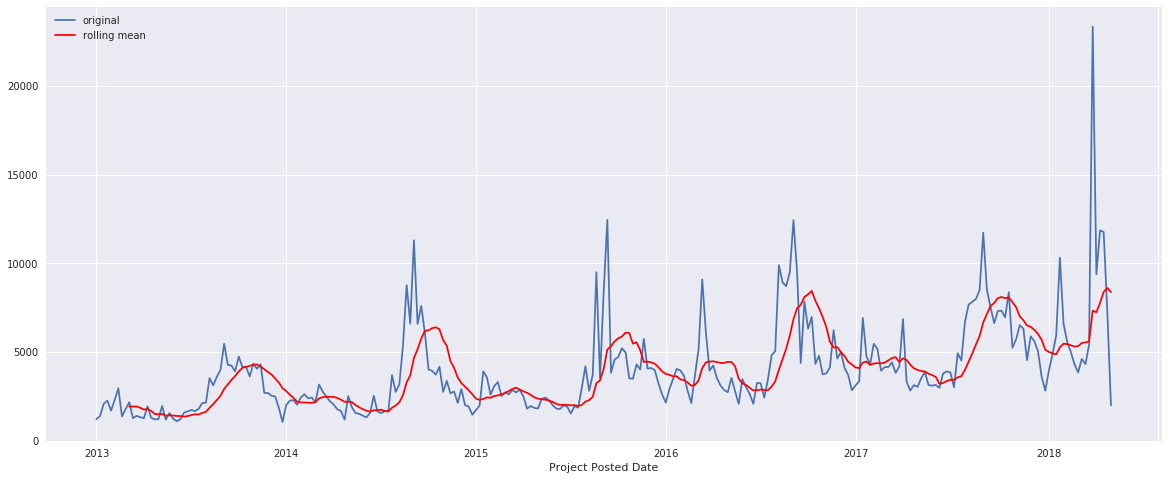

In [82]:
temp = pd.to_datetime(projects['Project Posted Date']).to_frame()
temp.loc[:,'count'] = 1
temp.sort_values(by='Project Posted Date',inplace=True)
temp.set_index(keys='Project Posted Date',inplace=True)
temp = temp.resample('W').count()
temp.set_index(temp.index.to_period(freq='W'),inplace=True)
ax1 = temp['count'].plot(figsize=(20,8))
mean = temp['count'].rolling(window=10).mean()
mean.plot(ax=ax1,color='r')
plt.legend(['original','rolling mean'])

It clearly has seasonality. To remove it, we shift it and then take the difference.

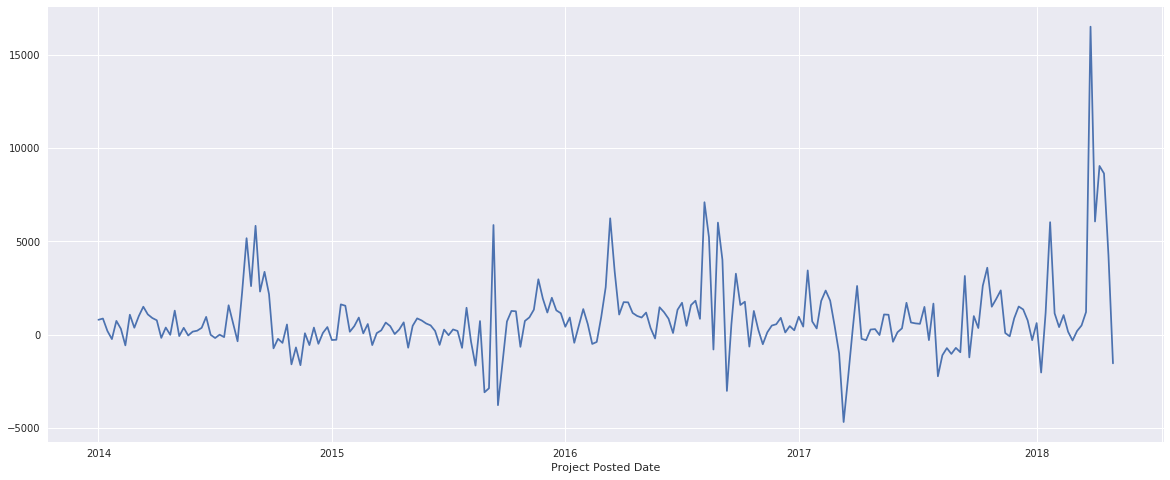

In [83]:
shifted = 52
temp.loc[:,'shifted_count'] = temp['count'].shift(shifted)
temp.loc[:,'diff_count'] = temp['count'].subtract(temp['shifted_count'])
temp.diff_count.plot(figsize=(20,8))

Let's check if this is stationary sequence.

In [84]:
test = adfuller(temp.diff_count.dropna(), autolag='AIC')
output = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags','Number of Observations Used'])
for k,v in test[4].items():
    output['Critical Value (%s)'%k] = v
print(output)

Test Statistic                -6.024578e+00
p-value                        1.466304e-07
#Lags                          4.000000e+00
Number of Observations Used    2.220000e+02
Critical Value (5%)           -2.874649e+00
Critical Value (1%)           -3.460154e+00
Critical Value (10%)          -2.573757e+00
dtype: float64


The P-value is very small, which means this series is stationary with high probability. Now we can analyze its autocorrelation and partial correlation.

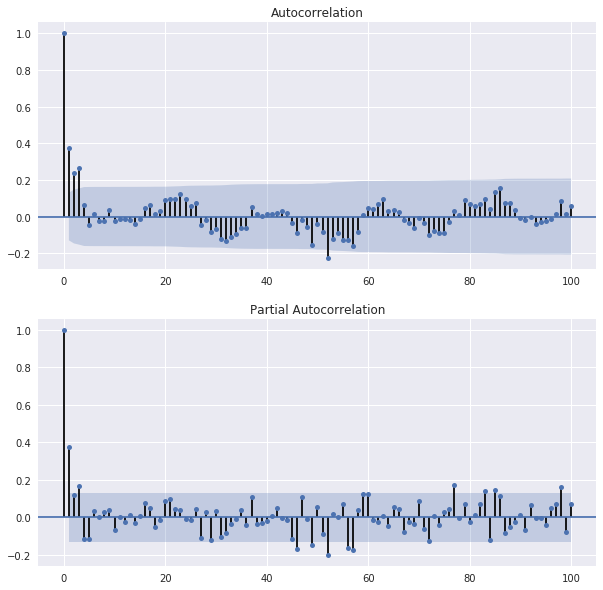

In [85]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
fig = plot_acf(temp.diff_count.dropna(), lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(temp.diff_count.dropna(), lags=100, ax=ax2)

According to Box-Jenkins method, we cannot fit neither AR nor MA model on this series. But since both ACF and PACF plots are sinusoidal, we may apply ARIMA model.

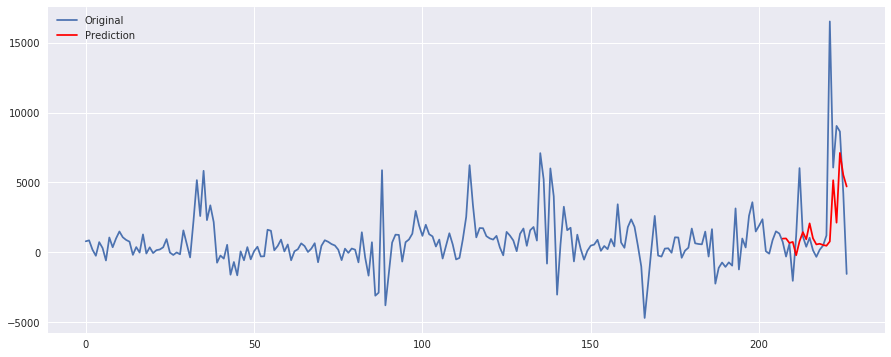

In [86]:
training = np.array(temp.diff_count.dropna())
test_len = 20
testing = training[len(training)-test_len:]
data = [x for x in training[:len(training)-test_len]]
predictions = []
for i in range(test_len):
    model = ARIMA(data, order=(3,1,1))
    ret = model.fit(disp=0)
    forecast = ret.forecast()
    prediction = forecast[0]
    predictions.append(prediction)
    data.append(testing[i])
plt.figure(figsize=(15,6))
plt.plot(training)
plt.plot(pd.Series(predictions,index=range(len(training)-test_len,len(training))), color='red')
plt.legend(['Original','Prediction'])

Although not so accurate, ARIMA model fit the original data a little bit. You can try tuning (p,d,q) to get the best ARIMA model.

### 6.2.2. Project Expired Date

### 6.2.3. Donation Received Date

### 6.2.4. Teacher First Project Posted Date

### 6.2.5. Donations